In [1]:
#%matplotlib notebook
%matplotlib widget
import csv
import pandas as pd
import numpy as np
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#import mpld3
from PIL import Image
import random


#%pip install plotly
#%pip install pandas
#%pip install mpld3
#%pip install -U scikit-learn
#%pip install ipympl
#%pip install ipympl

In [2]:
folder = 'RESULTS'
file_names_path=os.path.join(folder,'checkpoint.txt')
f = open(file_names_path, 'r')
file_names = f.read()
f.close()

In [3]:
print(file_names)

/images/sage_mobotix_cam_20220415-182808_6144x2048.jpg
/images/sage_mobotix_cam_20220415-185210_6144x2048.jpg
/images/sage_mobotix_cam_20220415-182229_6144x2048.jpg
/images/sage_mobotix_cam_20220415-214806_6144x2048.jpg
/images/sage_mobotix_cam_20220418-011728_6144x2048.jpg
/images/sage_mobotix_cam_20220415-011959_6144x2048.jpg
/images/sage_mobotix_cam_20220415-095051_6144x2048.jpg
/images/sage_mobotix_cam_20220415-060319_6144x2048.jpg
/images/sage_mobotix_cam_20220415-181701_6144x2048.jpg
/images/sage_mobotix_cam_20220415-220715_6144x2048.jpg
/images/sage_mobotix_cam_20220415-005749_6144x2048.jpg
/images/sage_mobotix_cam_20220415-220233_6144x2048.jpg
/images/sage_mobotix_cam_20220415-151807_6144x2048.jpg
/images/sage_mobotix_cam_20220415-193330_6144x2048.jpg
/images/sage_mobotix_cam_20220414-085058_6144x2048.jpg
/images/sage_mobotix_cam_20220415-140255_6144x2048.jpg
/images/sage_mobotix_cam_20220414-231728_6144x2048.jpg
/images/sage_mobotix_cam_20220414-220741_6144x2048.jpg
/images/sa

In [4]:
int_rep_path=os.path.join(folder,'internal_rep.pt')
rgb_int_rep_path=os.path.join(folder,'rgb_internal_rep.pt')
ir_int_rep_path=os.path.join(folder,'ir_internal_rep.pt')

int_rep=torch.load(int_rep_path)#[:100]
rgb_int_rep=torch.load(rgb_int_rep_path)#[:100]
ir_int_rep=torch.load(ir_int_rep_path)#[:100]

/tmp/ipykernel_1268214/2038234717.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  int_rep=torch.load(int_rep_path)#[:100]
/tmp/ipykernel_1268214/2038234717.py:6: FutureW

In [5]:
#int_rep=int_rep.cpu().detach().numpy()

In [6]:
print(int_rep.shape)
print(rgb_int_rep.shape)
print(ir_int_rep.shape)

torch.Size([12273, 5120])
torch.Size([12273, 5120])
torch.Size([12273, 5120])


In [7]:
int_rep=torch.cat((int_rep,rgb_int_rep,ir_int_rep), 0)

In [8]:
embedd_int_rep = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(int_rep)

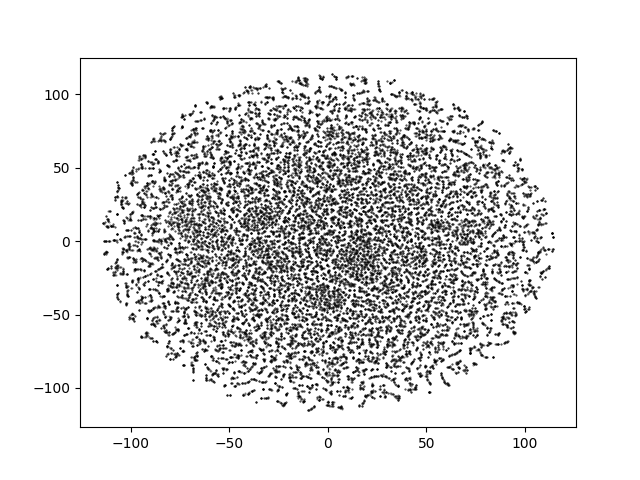

In [9]:
plt.scatter(embedd_int_rep[:,0], embedd_int_rep[:,1], alpha=0.5, color='black', s=0.2)
plt.show()

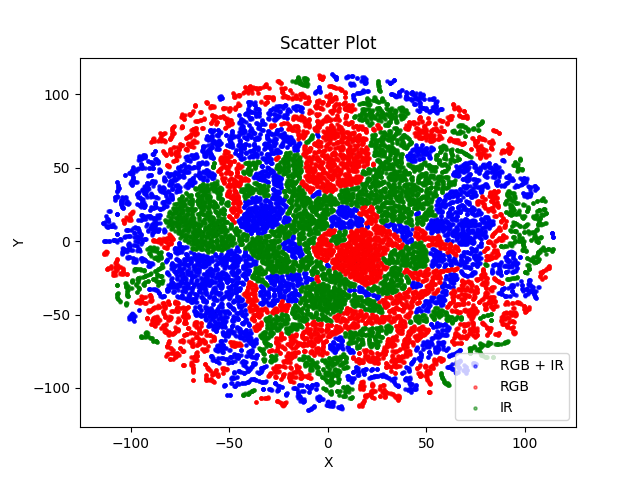

In [10]:
dim=12273
rgb_ir = embedd_int_rep[:dim,:]
rgb = embedd_int_rep[dim:dim+dim,:]
ir = embedd_int_rep[dim+dim:dim+dim+dim,:]
plt.scatter(rgb_ir[:,0], rgb_ir[:,1], alpha=0.5, color='blue', s=5, label=f'RGB + IR')
plt.scatter(rgb[:,0], rgb[:,1], alpha=0.5, color='red', s=5, label=f'RGB')
plt.scatter(ir[:,0], ir[:,1], alpha=0.5, color='green', s=5, label=f'IR')
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [11]:
output_path=os.path.join(folder,'output.csv')

In [12]:
classification=[]
image_paths=[]
with open(output_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(row)
        classification.append(row)
        image_paths.append("." + row[0][:-1])

['/images/sage_mobotix_cam_20220415-182808_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-185210_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-182229_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-214806_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220418-011728_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-011959_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-095051_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-060319_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-181701_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-220715_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-005749_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-220233_6144x2048.jpg,', '0,', '0,', '0']
['/images/sage_mobotix_cam_20220415-151807_6144x2048.jpg,', '0,', '0,', '0']

In [13]:
len(classification)

12273

In [14]:
print(rgb_ir.shape)
print(rgb.shape)
print(ir.shape)

(12273, 2)
(12273, 2)
(12273, 2)


In [15]:
# Assuming rgb.shape is (2580, 2) and len(classification) is 2580
#x = rgb_ir[:, 0]  # Get the first column of rgb (x-coordinates)
#y = rgb_ir[:, 1]  # Get the second column of rgb (y-coordinates)
x = rgb[:, 0]  # Get the first column of rgb (x-coordinates)
y = rgb[:, 1]  # Get the second column of rgb (y-coordinates)
#x = ir[:, 0]  # Get the first column of rgb (x-coordinates)
#y = ir[:, 1]  # Get the second column of rgb (y-coordinates)


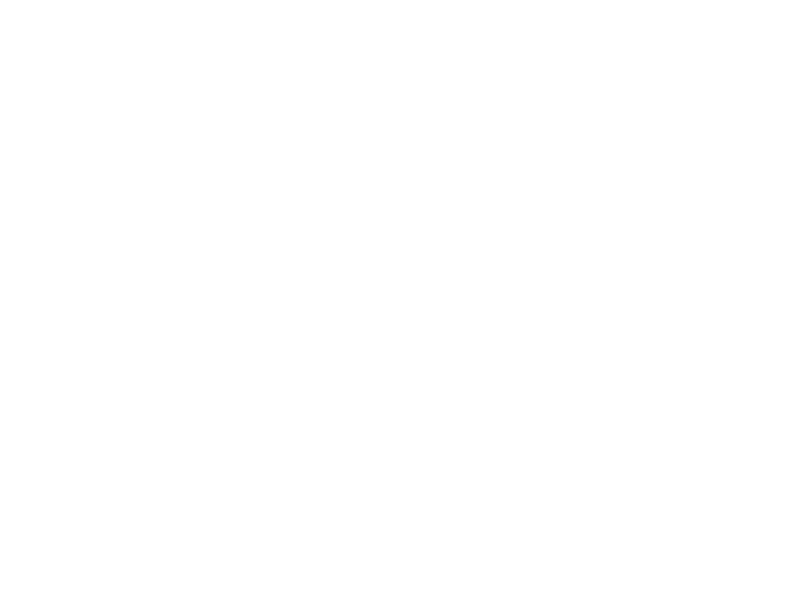

In [16]:
# Create a scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
colors = ['black', 'r']  # Define colors for the classes (red for 0, green for 1)


In [17]:
Classification=[]
for Class in classification:
    #print(Class[1])
    Classification.append(Class[2])

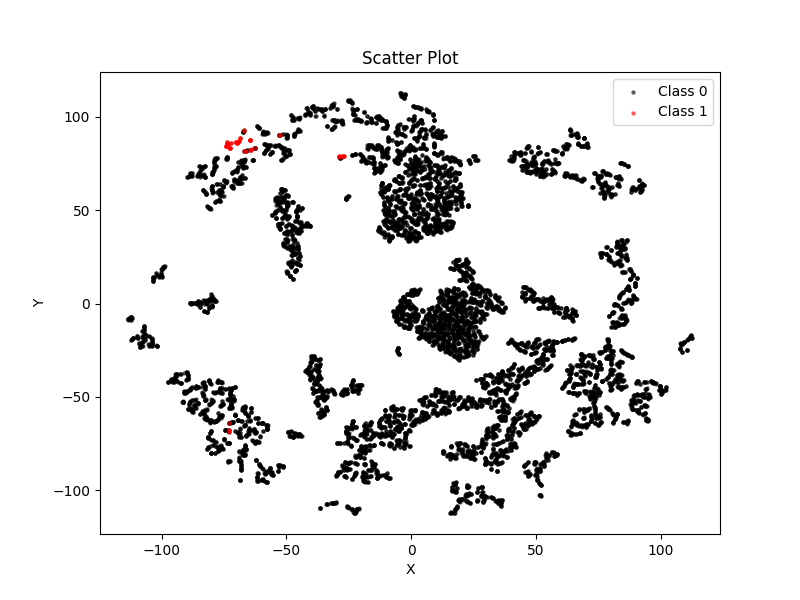

In [18]:
# Iterate over the unique labels and plot the points with corresponding colors
for label in [0, 1]:
    indices = [i for i, l in enumerate(Classification) if int(l[0]) == label]
    plt.scatter(x[indices], y[indices], c=colors[label], label=f'Class {label}', alpha=0.5, s=5)

plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [19]:
z = np.stack((x, y), axis=1)
z.shape

(12273, 2)

In [26]:
v=np.array([-71.0,88.0])
#v=np.array([-102.9,-46.0])

# Step 1: Broadcast V to match the shape of C
v_broadcasted = np.tile(v, (z.shape[0], 1))

# Step 2: Calculate the Euclidean distances
distances = np.linalg.norm(z - v_broadcasted, axis=1)

# Step 3: Find the indices of the 10 smallest distances
closest_indices = np.argsort(distances)[:10]

print(closest_indices)

[ 3755  8421  2481  2328  2655  5097  3599  9612 10593  4004]


['/images/sage_mobotix_cam_20220415-210112_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210108_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210121_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210129_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210055_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210138_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210134_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210125_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210146_6144x2048.jpg,', '0,', '1,', '0']
['/images/sage_mobotix_cam_20220415-210103_6144x2048.jpg,', '0,', '1,', '0']


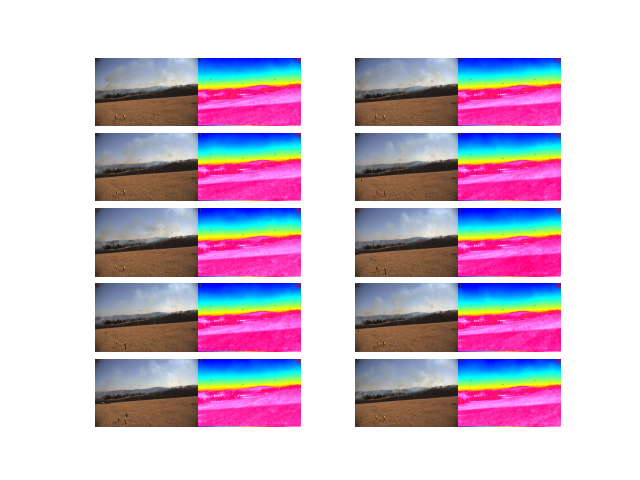

In [27]:
# Create a figure with a grid of subplots
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols)#, figsize=(20, 8))

for i, index in enumerate(closest_indices):
    row = i // num_cols
    col = i % num_cols
    print(classification[index])
    image_path=classification[index][0][:-1]
    image = mpimg.imread("." + image_path)
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()


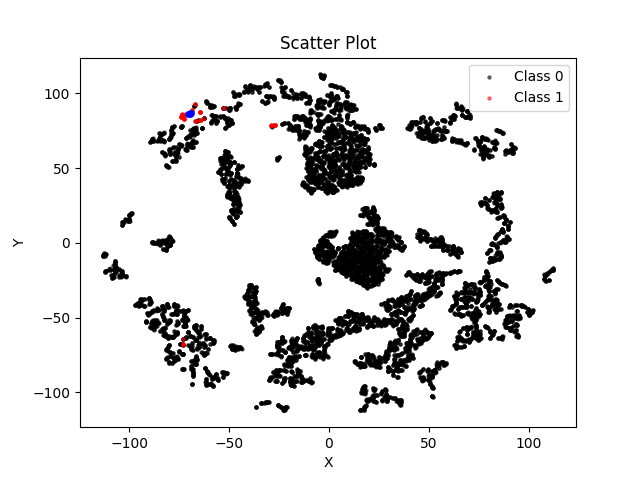

In [28]:
# Iterate over the unique labels and plot the points with corresponding colors
fig=plt.figure()
for label in [0, 1]:
    indices = [i for i, l in enumerate(Classification) if int(l[0]) == label]
    plt.scatter(x[indices], y[indices], c=colors[label], label=f'Class {label}', alpha=0.5, s=5)


plt.scatter(x[closest_indices], y[closest_indices], c='blue', alpha=0.5, s=15)

plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [29]:
# Generate data x, y for scatter and an array of images.
images=[]
for image_path in image_paths:
    
    print(image_path)
    image = Image.open(image_path)
    print(image.size)
    images.append(image.resize((int(image.size[0]/10), int(image.size[1]/10))))

./images/sage_mobotix_cam_20220415-182808_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-185210_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-182229_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-214806_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220418-011728_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-011959_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-095051_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-060319_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-181701_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-220715_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-005749_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-220233_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-151807_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220415-193330_6144x2048.jpg
(6144, 2048)
./images/sage_mobotix_cam_20220414

In [30]:
# # create figure and plot scatter
# fig = plt.figure()
# ax = fig.add_subplot(111)
# line, = ax.plot(x,y, ls="", marker="o", markersize=0.5)

# # create the annotations box
# image = Image.open(image_paths[0])
# im = OffsetImage(image, zoom=5)
# xybox=(50., 50.)
# ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
#         boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# # add it to the axes and make it invisible
# ax.add_artist(ab)
# ab.set_visible(False)

# def hover(event):
#     # if the mouse is over the scatter points
#     if line.contains(event)[0]:
#         # find out the index within the array from the event
#         ind, = line.contains(event)[1]["ind"]
#         # get the figure size
#         w,h = fig.get_size_inches()*fig.dpi
#         ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
#         hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
#         # if event occurs in the top or right quadrant of the figure,
#         # change the annotation box position relative to mouse.
#         ab.xybox = (xybox[0]*ws, xybox[1]*hs)
#         # make annotation box visible
#         ab.set_visible(True)
#         # place it at the position of the hovered scatter point
#         ab.xy =(x[ind], y[ind])
#         # set the image corresponding to that point
#         #im.set_data(arr[ind,:,:])
#         image=Image.open(image_paths[ind])
#         im.set_data(image)
#     else:
#         #if the mouse is not over a scatter point
#         ab.set_visible(False)
#     fig.canvas.draw_idle()

# # add callback for mouse moves
# fig.canvas.mpl_connect('motion_notify_event', hover)           
# plt.show()

In [31]:
counter=0
for classif in Classification:
    if 1==int(classif[0]):
        counter+=1

len(Classification)/counter

175.32857142857142